
# Projeto: Predição de Recorrência de Câncer de Mama com KNN


**Contexto**

O câncer de mama é uma das doenças mais comuns e preocupantes entre as mulheres em todo o mundo. Embora existam tratamentos eficazes, a possibilidade de recorrência do câncer após o tratamento inicial continua sendo um fator crítico para o prognóstico e a condução do acompanhamento clínico. Prever a chance de recorrência com base em dados clínicos e históricos do paciente pode auxiliar médicos e sistemas de saúde a personalizar tratamentos e priorizar recursos de forma mais eficaz.



**Objetivo**

O objetivo deste projeto é utilizar Inteligência Artificial — mais especificamente o algoritmo K-Nearest Neighbors (KNN) — para prever a recorrência ou não de câncer de mama, com base em variáveis como idade, estágio da menopausa, tamanho do tumor, número de linfonodos comprometidos, localização do tumor, e outros fatores clínicos.

## 1. Importação das Bibliotecas

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


## 2. Declaração de Funções

In [ ]:
def verifica_normalidade (dataframe, coluna):
  coluna_data = dataframe[coluna]
  statistc, p_valor = shapiro(coluna_data)
  nivel_significancia = 0.1

  if p_valor > nivel_significancia:
    print(f"A coluna '{coluna}' segue uma distribuição normal com p_valor {p_valor}.")
    return True

  else:
    print(f" A coluna '{coluna}' nao segue uma distribuicao normal, com p_valor '{p_valor}'. ")
    return False


def intervalo_para_media(valor):
    if isinstance(valor, str) and '-' in valor:
        inicio, fim = valor.split('-')
        return (int(inicio) + int(fim)) / 2
    else:
        return valor


## 3. Carregamento e Preparação dos Dados

In [ ]:
df = ("https://raw.githubusercontent.com/GustavoUrsino22/KNN-PREDICAO-CANCER-DE-MAMA/refs/heads/main/breast-cancer.csv")

In [ ]:
colunas = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
           'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

In [ ]:
df = pd.read_csv(df, header=None, names=colunas)

In [ ]:
display(df.head(10))

print("")
print("")

for coluna in df.columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].unique())
    print("-" * 50)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no




Coluna: Class
['no-recurrence-events' 'recurrence-events']
--------------------------------------------------
Coluna: age
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
--------------------------------------------------
Coluna: menopause
['premeno' 'ge40' 'lt40']
--------------------------------------------------
Coluna: tumor-size
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
--------------------------------------------------
Coluna: inv-nodes
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
--------------------------------------------------
Coluna: node-caps
['no' 'yes' '?']
--------------------------------------------------
Coluna: deg-malig
[3 2 1]
--------------------------------------------------
Coluna: breast
['left' 'right']
--------------------------------------------------
Coluna: breast-quad
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
--------------------------------------------------
Coluna: irradiat
['no' 'ye

In [ ]:
quantidade_por_coluna = (df == "?").sum()

print("Quantidade de '?' por coluna:")
print(quantidade_por_coluna)



Quantidade de '?' por coluna:
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64


In [ ]:
print("Quantidade de NaN por coluna:")
print(df.isnull().sum())


Quantidade de NaN por coluna:
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


In [ ]:
df_com_interrogacao = df[df.isin(["?"]).any(axis=1)]
display(df_com_interrogacao)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [ ]:
total_linhas = len(df)
quantidade_interrogacao = (df == "?").sum()
porcentagem_interrogacao = (quantidade_interrogacao / total_linhas) * 100

print("Proporção (%) de '?' por coluna:")
print(porcentagem_interrogacao.round(2))


Proporção (%) de '?' por coluna:
Class          0.00
age            0.00
menopause      0.00
tumor-size     0.00
inv-nodes      0.00
node-caps      2.80
deg-malig      0.00
breast         0.00
breast-quad    0.35
irradiat       0.00
dtype: float64


In [ ]:
df= df[~df.isin(["?"]).any(axis=1)]

In [ ]:
ordem_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
distribuicao_idade = df['age'].value_counts().reindex(ordem_idade)

In [ ]:
colunas_intervalos = ['age', 'tumor-size', 'inv-nodes']

for coluna in colunas_intervalos:
    df[coluna] = df[coluna].apply(intervalo_para_media)

df = df[~df['age'].isin([24.5, 74.5])]

<ipython-input-217-d555342c8d88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna].apply(intervalo_para_media)


In [ ]:
for i in colunas_intervalos:
  verifica_normalidade (df, i)

 A coluna 'age' nao segue uma distribuicao normal, com p_valor '7.473008576075825e-14'. 
 A coluna 'tumor-size' nao segue uma distribuicao normal, com p_valor '2.4062672976435593e-05'. 
 A coluna 'inv-nodes' nao segue uma distribuicao normal, com p_valor '1.2032697633914474e-26'. 


In [ ]:
for i in colunas_intervalos:
    df[i] = df[i].astype(float)

    scaler = MinMaxScaler()
    df.loc[:, i] = scaler.fit_transform(df[[i]])


In [ ]:
# Supondo que seu DataFrame se chame df
# Exibe todos os valores únicos de cada coluna
for coluna in df.columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].unique())
    print("-" * 50)

Coluna: Class
['no-recurrence-events' 'recurrence-events']
--------------------------------------------------
Coluna: age
[0.         0.33333333 1.         0.66666667]
--------------------------------------------------
Coluna: menopause
['premeno' 'ge40' 'lt40']
--------------------------------------------------
Coluna: tumor-size
[0.6 0.4 0.3 0.  0.5 1.  0.2 0.8 0.7 0.1 0.9]
--------------------------------------------------
Coluna: inv-nodes
[0.    0.25  0.375 0.125 0.625 0.5   1.   ]
--------------------------------------------------
Coluna: node-caps
['no' 'yes']
--------------------------------------------------
Coluna: deg-malig
[3 2 1]
--------------------------------------------------
Coluna: breast
['left' 'right']
--------------------------------------------------
Coluna: breast-quad
['left_low' 'right_up' 'left_up' 'right_low' 'central']
--------------------------------------------------
Coluna: irradiat
['no' 'yes']
--------------------------------------------------


In [ ]:
colunas_categoricas = ['menopause','node-caps', 'breast', 'breast-quad']  #'irradiat'
df = pd.get_dummies(df, columns=colunas_categoricas)

colunas_dummies = [col for col in df.columns if any(cat in col for cat in colunas_categoricas)]
df[colunas_dummies] = df[colunas_dummies].astype(int)

In [ ]:
# Substituir diretamente os valores
df['irradiat'] = df['irradiat'].map({
    'yes': 0,  # quem fez radioterapia → menor risco
    'no': 1    # quem não fez → maior risco
})


# Instanciar o scaler
scaler = MinMaxScaler()

# Normalizar apenas a coluna 'irradiat'
df[['irradiat']] = scaler.fit_transform(df[['irradiat']])


# Instanciar o scaler
scaler = MinMaxScaler()

# Normalizar apenas a coluna 'irradiat'
df[['deg-malig']] = scaler.fit_transform(df[['deg-malig']])

In [ ]:
df

,Class,age,tumor-size,inv-nodes,deg-malig,irradiat,menopause_ge40,menopause_lt40,menopause_premeno,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,no-recurrence-events,0.000000,0.6,0.000,1.0,1.0,0,0,1,1,0,1,0,0,1,0,0,0
1,no-recurrence-events,0.333333,0.4,0.000,0.5,1.0,0,0,1,1,0,0,1,0,0,0,0,1
2,no-recurrence-events,0.333333,0.4,0.000,0.5,1.0,0,0,1,1,0,1,0,0,1,0,0,0
3,no-recurrence-events,1.000000,0.3,0.000,0.5,1.0,1,0,0,1,0,0,1,0,0,1,0,0
4,no-recurrence-events,0.333333,0.0,0.000,0.5,1.0,0,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,0.000000,0.6,0.000,0.5,1.0,0,0,1,1,0,1,0,0,0,1,0,0
282,recurrence-events,0.000000,0.4,0.000,1.0,0.0,0,0,1,1,0,1,0,0,0,1,0,0
283,recurrence-events,1.000000,0.4,0.000,0.0,1.0,1,0,0,1,0,0,1,0,0,1,0,0
284,recurrence-events,0.333333,0.6,0.125,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
for coluna in df.columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].unique())
    print("-" * 50)

Coluna: Class
['no-recurrence-events' 'recurrence-events']
--------------------------------------------------
Coluna: age
[0.         0.33333333 1.         0.66666667]
--------------------------------------------------
Coluna: tumor-size
[0.6 0.4 0.3 0.  0.5 1.  0.2 0.8 0.7 0.1 0.9]
--------------------------------------------------
Coluna: inv-nodes
[0.    0.25  0.375 0.125 0.625 0.5   1.   ]
--------------------------------------------------
Coluna: deg-malig
[1.  0.5 0. ]
--------------------------------------------------
Coluna: irradiat
[1. 0.]
--------------------------------------------------
Coluna: menopause_ge40
[0 1]
--------------------------------------------------
Coluna: menopause_lt40
[0 1]
--------------------------------------------------
Coluna: menopause_premeno
[1 0]
--------------------------------------------------
Coluna: node-caps_no
[1 0]
--------------------------------------------------
Coluna: node-caps_yes
[0 1]
--------------------------------------------

## 4. Modelo

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

y = y.map({'no-recurrence-events': 0, 'recurrence-events': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### **4.1 Definição de K ideal**

### Método Empírico (Raiz Quadrada de n)


O método empírico é uma técnica simples e rápida para *estimar um valor inicial de k* no algoritmo KNN.

Ele se baseia na seguinte fórmula:

***k ≈ √n***

Onde n representa o número total de observações no conjunto de dados.

- É útil como ponto de partida antes de usar métodos mais sofisticados.

- Evita começar com valores muito baixos (ex.: k=1, que tende a overfitting).

- É fácil de calcular e aplicar em datasets de qualquer tamanho.

In [ ]:
import math

# Número de observações no dataset (considerando treino)
n_obs = len(df)

# Calcular k como a raiz quadrada de n
k_inicial = int(math.sqrt(n_obs))

# Se k for par, soma 1 para garantir que seja ímpar (evita empate)
if k_inicial % 2 == 0:
    k_inicial += 1

print(f"Número de observações: {n_obs}")
print(f"K sugerido pela heurística √n (ajustado para ímpar): {k_inicial}")


Número de observações: 271
K sugerido pela heurística √n (ajustado para ímpar): 17


### Método de Cross-Validation

A validação cruzada, ou cross-validation, é uma técnica estatística usada para avaliar o desempenho de um modelo de machine learning de forma mais confiável.

Ela é especialmente útil quando se deseja **evitar que o modelo fique muito dependente de uma única divisão entre treino e teste**, ajudando a medir a capacidade de generalização do modelo.



A validação cruzada é uma das formas mais confiáveis de avaliar modelos, especialmente em **bases menores ou desbalanceadas**. Ela garante que o valor de k escolhido para o KNN não seja resultado de sorte em uma única divisão dos dados, mas sim de um desempenho consistente em múltiplas simulações.

Melhor k (com validação cruzada): 8


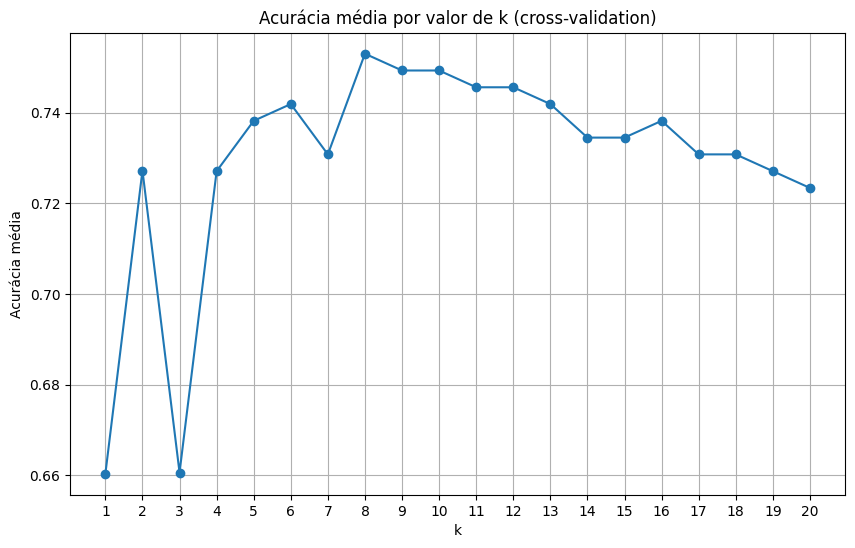

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Intervalo de k para testar
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
    k_scores.append(scores.mean())

# Mostrar o melhor k
melhor_k = k_range[np.argmax(k_scores)]
print(f"Melhor k (com validação cruzada): {melhor_k}")

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title("Acurácia média por valor de k (cross-validation)")
plt.xlabel("k")
plt.ylabel("Acurácia média")
plt.xticks(k_range)
plt.grid(True)
plt.show()


### Método GridSearchCV

O GridSearchCV é um **método automatizado de busca pelos melhores hiperparâmetros de um modelo de machine learning**. Ele faz parte da biblioteca scikit-learn e é amplamente utilizado para otimizar modelos de forma sistemática e precisa.

No contexto do algoritmo K-Nearest Neighbors (KNN), o GridSearchCV é usado para encontrar o valor ideal de k (número de vizinhos) que **proporciona o melhor desempenho ao modelo**.

- Define-se um conjunto de valores candidatos para o hiperparâmetro k (ex: de 1 a 20).

- O GridSearchCV testa todas as combinações possíveis (neste caso, os diferentes valores de k).

- Para cada valor testado, o modelo é avaliado usando validação cruzada (ex: 10-fold).

- O valor de k com melhor desempenho médio é selecionado como o ideal.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print(f"Melhor k encontrado: {grid.best_params_['n_neighbors']}")


Melhor k encontrado: 8


### Método Elbow (Cotovelo)

O Elbow Method, ou Método do Cotovelo, é uma **técnica gráfica usada para determinar o valor ideal de k no algoritmo K-Nearest Neighbors** (KNN).

A ideia central do método é avaliar a performance do modelo (geralmente a taxa de erro ou a acurácia) em função de diferentes valores de k. O objetivo é identificar o ponto em que o aumento de k deixa de melhorar significativamente o desempenho do modelo — esse ponto é visualmente semelhante a um “cotovelo” no gráfico.

 - Treina-se o modelo KNN para diversos valores de k (ex: de 1 a 20).

 - Calcula-se a taxa de erro ou acurácia para cada k.

 - Plota-se um gráfico com o valor de k no eixo x e a métrica de avaliação no eixo y.

 - O valor de k onde o gráfico forma um “cotovelo” é considerado o ideal, pois representa o melhor trade-off entre overfitting e underfitting.

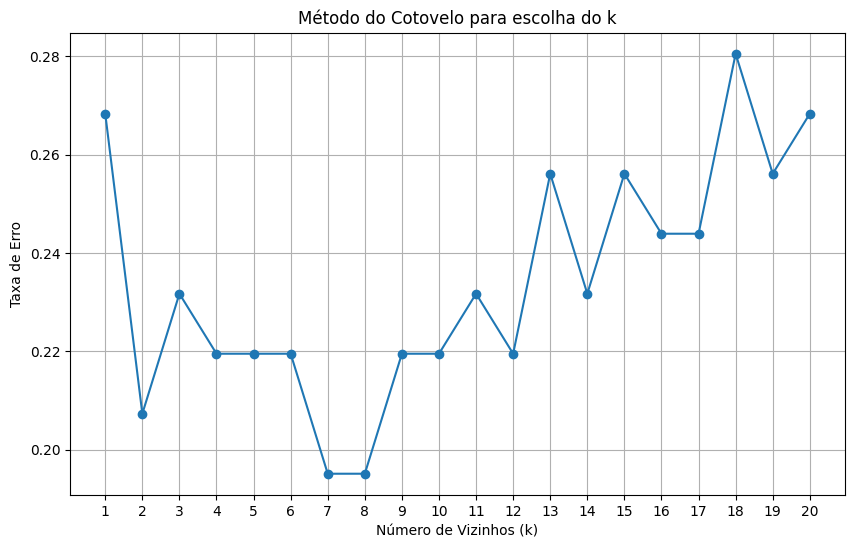

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Testar k de 1 a 20
k_range = range(1, 21)
taxa_erro = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Taxa de erro (1 - acurácia)
    erro = 1 - accuracy_score(y_test, y_pred)
    taxa_erro.append(erro)

# Plotando o Método do Cotovelo
plt.figure(figsize=(10,6))
plt.plot(k_range, taxa_erro, marker='o', linestyle='-')
plt.title('Método do Cotovelo para escolha do k')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Taxa de Erro')
plt.xticks(k_range)
plt.grid(True)
plt.show()


### Treinando | Modelo | Resultados


--- k = 7 ---
Acurácia: 0.8049
Matriz de Confusão:
[[56  1]
 [15 10]]


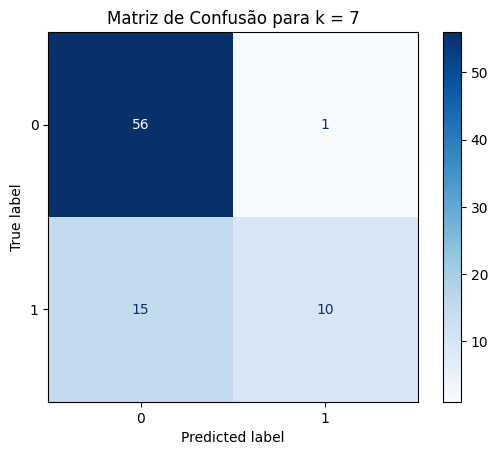

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        57
           1       0.91      0.40      0.56        25

    accuracy                           0.80        82
   macro avg       0.85      0.69      0.72        82
weighted avg       0.83      0.80      0.78        82


--- k = 8 ---
Acurácia: 0.8049
Matriz de Confusão:
[[57  0]
 [16  9]]


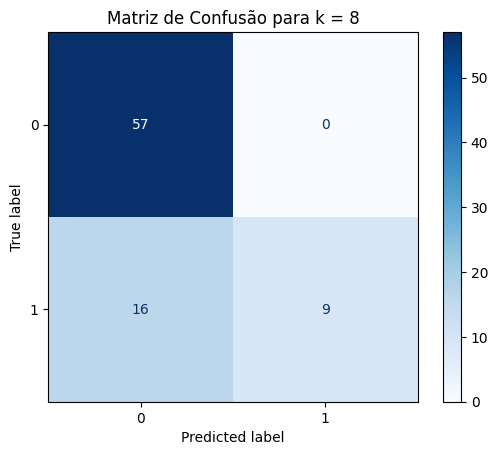

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        57
           1       1.00      0.36      0.53        25

    accuracy                           0.80        82
   macro avg       0.89      0.68      0.70        82
weighted avg       0.85      0.80      0.77        82


--- k = 9 ---
Acurácia: 0.7805
Matriz de Confusão:
[[54  3]
 [15 10]]


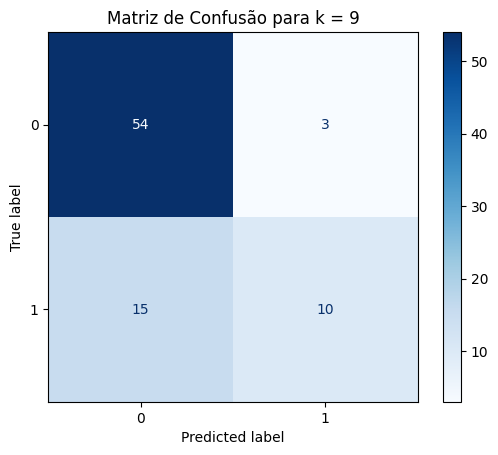

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        57
           1       0.77      0.40      0.53        25

    accuracy                           0.78        82
   macro avg       0.78      0.67      0.69        82
weighted avg       0.78      0.78      0.76        82


--- k = 10 ---
Acurácia: 0.7805
Matriz de Confusão:
[[56  1]
 [17  8]]


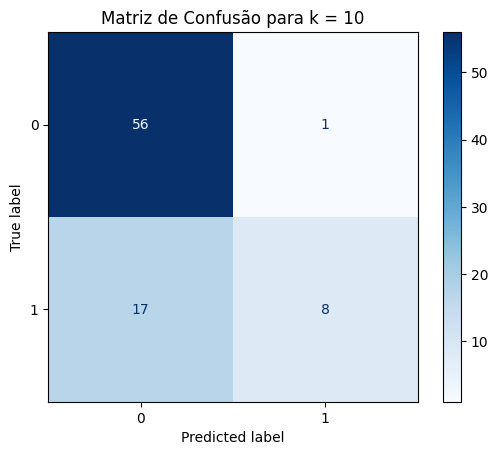

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        57
           1       0.89      0.32      0.47        25

    accuracy                           0.78        82
   macro avg       0.83      0.65      0.67        82
weighted avg       0.80      0.78      0.74        82


--- k = 11 ---
Acurácia: 0.7683
Matriz de Confusão:
[[54  3]
 [16  9]]


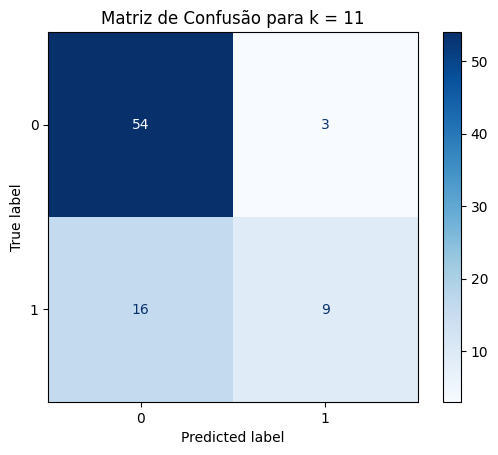

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        57
           1       0.75      0.36      0.49        25

    accuracy                           0.77        82
   macro avg       0.76      0.65      0.67        82
weighted avg       0.76      0.77      0.74        82


--- k = 12 ---
Acurácia: 0.7805
Matriz de Confusão:
[[57  0]
 [18  7]]


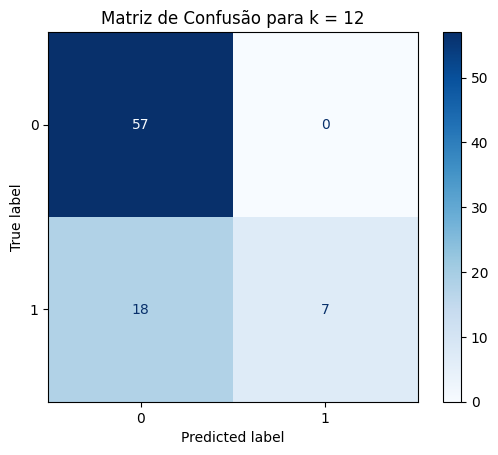

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        57
           1       1.00      0.28      0.44        25

    accuracy                           0.78        82
   macro avg       0.88      0.64      0.65        82
weighted avg       0.83      0.78      0.73        82



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for k in range(7, 13):
    print(f'\n--- k = {k} ---')

    # 1. Criar e treinar o modelo
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # 2. Prever
    y_pred = knn.predict(X_test)

    # 3. Avaliar
    acc = accuracy_score(y_test, y_pred)
    print(f'Acurácia: {acc:.4f}')

    # 4. Matriz de confusão numérica
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusão:')
    print(matriz)

    # 5. Matriz de confusão gráfica
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
    disp.plot(cmap='Blues')  # Deixa azulzinho
    plt.title(f'Matriz de Confusão para k = {k}')
    plt.show()

    # 6. Relatório de classificação
    print('Relatório de Classificação:')
    print(classification_report(y_test, y_pred))





## 5. Reduzir Falsos Negativos (melhorar recall da classe “recorrência”)



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Separar X e y
X = df.drop('Class', axis=1)
y = df['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})

# 2. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Aplicar SMOTE APENAS NO TREINO
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar nova distribuição
from collections import Counter
print("Distribuição antes do SMOTE:", Counter(y_train))
print("Distribuição após o SMOTE :", Counter(y_train_res))


Distribuição antes do SMOTE: Counter({0: 133, 1: 56})
Distribuição após o SMOTE : Counter({0: 133, 1: 133})


In [ ]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_res, y_train_res)

y_pred = knn.predict(X_test)


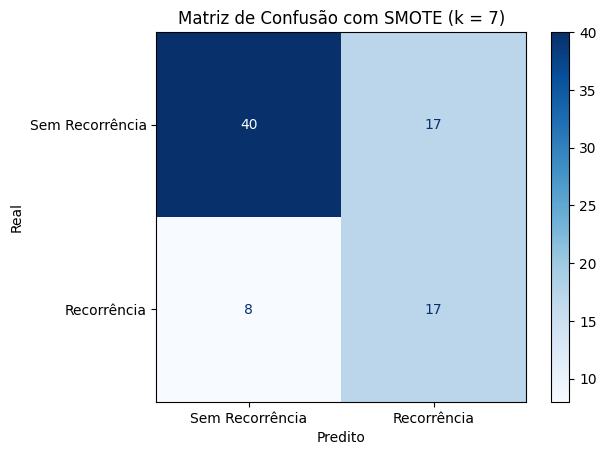

Relatório de Classificação:
                 precision    recall  f1-score   support

Sem Recorrência       0.83      0.70      0.76        57
    Recorrência       0.50      0.68      0.58        25

       accuracy                           0.70        82
      macro avg       0.67      0.69      0.67        82
   weighted avg       0.73      0.70      0.71        82

Acurácia: 0.6951


In [ ]:
# 6. Matriz de confusão gráfica
labels = ['Sem Recorrência', 'Recorrência']
matriz = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão com SMOTE (k = 7)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.grid(False)
plt.show()

# 7. Relatório
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=labels))
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")

“Apesar da leve redução na precisão da classe 'Recorrência' (de 0.63 para 0.50), o aumento no recall (de 0.40 para 0.68) representa um avanço significativo. Isso significa que o modelo passou a identificar mais pacientes que realmente terão recorrência, o que é crucial em contextos clínicos. O aumento de falsos positivos é um impacto esperado e aceitável quando a prioridade é não deixar casos de risco passarem despercebidos.